In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from sqlalchemy import create_engine
engine = create_engine('postgres://postgres:PASSWORD@#@localhost:5432/employee_db')
connection = engine.connect()

In [28]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [29]:
salaries = pd.read_sql('SELECT * FROM salaries', con=engine)

In [30]:
titles = pd.read_sql('SELECT * FROM titles', con=engine)

In [35]:
merged = pd.merge(salaries, titles, how='left', on='emp_no')
merged.head()

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


In [36]:
avg_salaries = merged.groupby('title').mean().drop(columns='emp_no').reset_index()

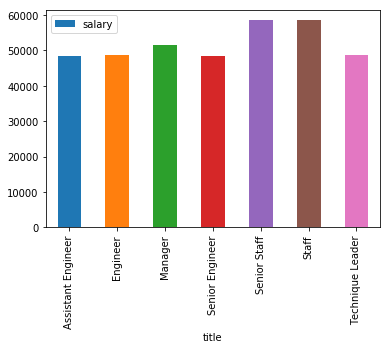

In [37]:
avg_salaries.plot.bar(x='title', y='salary')